## Setup

In [40]:
# Se cargan las librerías
from pandas import DataFrame
from pandas import concat
import random
from scipy import stats
import numpy as np
import pandas as pd
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from pandas import DataFrame
from pandas import concat
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from IPython.display import YouTubeVideo
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from darts import TimeSeries
import pmdarima as pm
from darts import TimeSeries
from darts.models import (NaiveSeasonal,NaiveDrift,RNNModel,Prophet,ExponentialSmoothing,ARIMA,AutoARIMA,TCNModel,TransformerModel,Theta,FFT)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
df = pd.read_excel('datos.xlsx')
df.replace(0, np.nan, inplace=True)

In [42]:
train = df[:int(0.85*(len(df)))].iloc[1:]
test = df[int(0.85*(len(df))):]

In [204]:
# Se crea la serie de tiempo de train y test para las diferentes predicciones
# tr_{columna} = dataframe de train
# ts_{columna} = dataframe de test
# df_{columna} = dataframe de df
# trs_{columna} = serie de tiempo de train
# tss_{columna} = serie de tiempo de test 
# dfs_{columna} = serie de tiempo de df

tr_retail = pd.DataFrame({
    'ds': train['mes'],
    'y': train['v_retail']
})
ts_retail = pd.DataFrame({
    'ds': test['mes'],
    'y': test['v_retail']
})
df_retail = pd.DataFrame({
    'ds': df['mes'],
    'y': df['v_retail']
})

trs_retail = TimeSeries.from_dataframe(tr_retail, 'ds', 'y')
tss_retail = TimeSeries.from_dataframe(ts_retail, 'ds', 'y')
dfs_retail = TimeSeries.from_dataframe(df_retail, 'ds', 'y')

## Modelos

### Suavizado exponencial

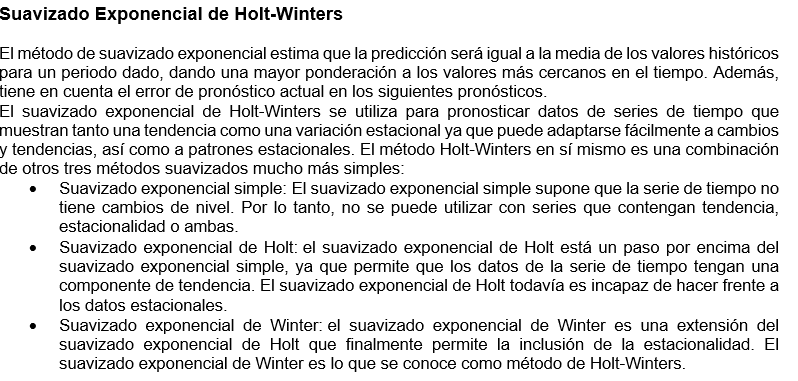

#### Suavizado exponencial simple

In [209]:

from darts.utils.utils import ModelMode, SeasonalityMode
resultados = pd.DataFrame()

Test RMSE: 1572606.658
Test MSE: 2473091701683.681
Test MAE: 1448187.543
Test R2: -4.568


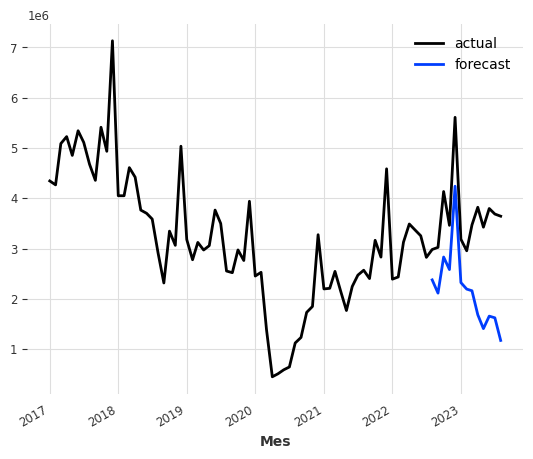

In [210]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing()
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Simple','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

#### Suavizado Exponencial de Holt

Test RMSE: 1572606.658
Test MSE: 2473091701683.681
Test MAE: 1448187.543
Test R2: -4.568


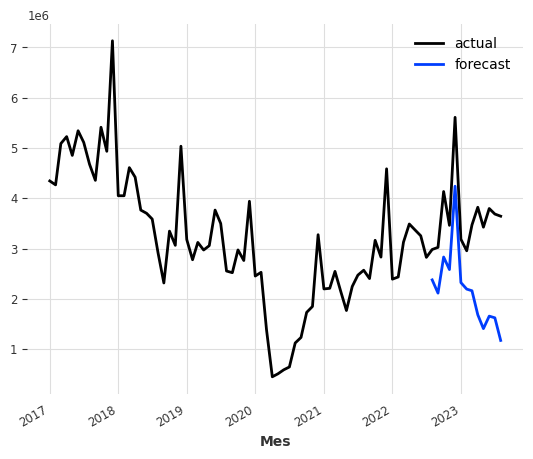

In [211]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.ADDITIVE) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Holt (Add)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

Test RMSE: 1194562.997
Test MSE: 1426980754079.888
Test MAE: 1104117.735
Test R2: -2.213


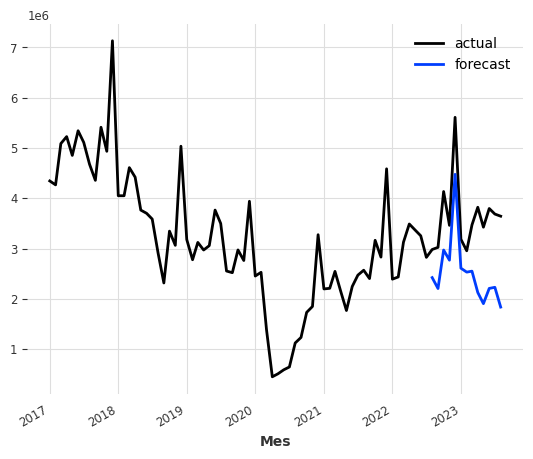

In [212]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.MULTIPLICATIVE) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Holt (Mult)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

#### Suavizado de Winter

Test RMSE: 1572606.658
Test MSE: 2473091701683.681
Test MAE: 1448187.543
Test R2: -4.568


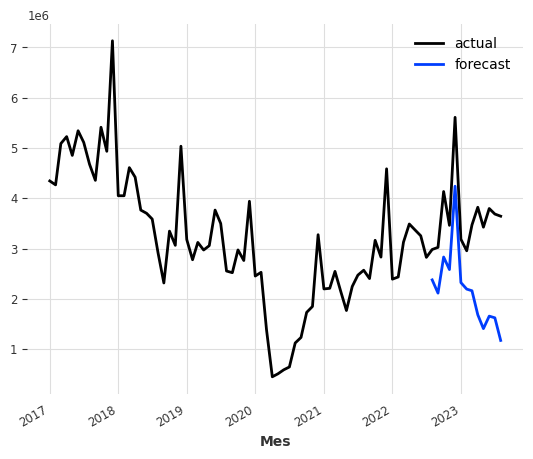

In [213]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=SeasonalityMode.ADDITIVE,seasonal_periods=12) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Winter (Add,Add)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

Test RMSE: 1194562.997
Test MSE: 1426980754079.888
Test MAE: 1104117.735
Test R2: -2.213


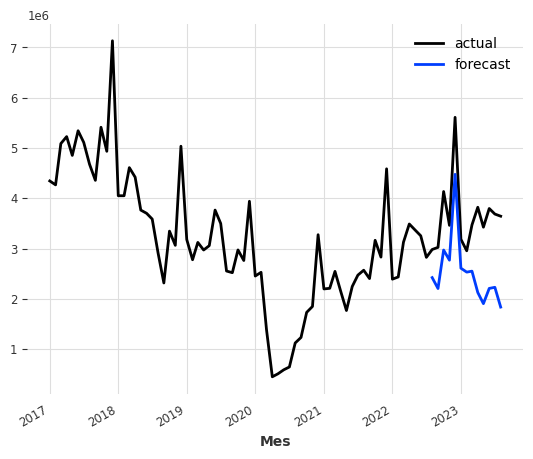

In [214]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.MULTIPLICATIVE, seasonal=SeasonalityMode.ADDITIVE,seasonal_periods=12) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Winter (Mult,Add)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

Test RMSE: 15361307874.374
Test MSE: 235969779611295121408.000
Test MAE: 6191959844.164
Test R2: -531290188.770


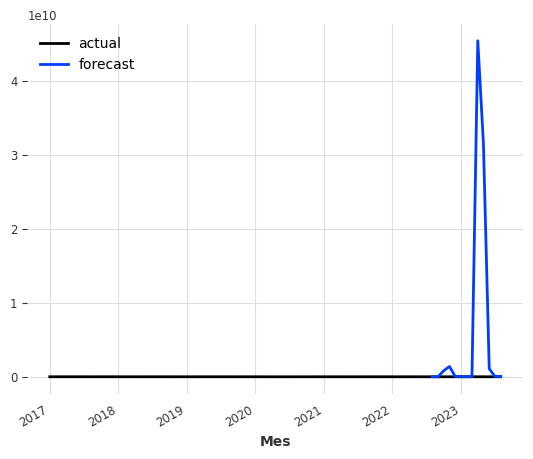

In [215]:

# Se inicializa, se entrena el modelo y se generan las predicciones
model = ExponentialSmoothing(trend=ModelMode.MULTIPLICATIVE, seasonal=SeasonalityMode.MULTIPLICATIVE,seasonal_periods=12) 
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'EXS: Winter (Mult,Mult)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

In [216]:
resultados

,Modelo,RMSE,MSE,MAE,R2
0,EXS: Simple,1.572607e+06,2.473092e+12,1.448188e+06,-4.568210e+00
0,EXS: Holt (Add),1.572607e+06,2.473092e+12,1.448188e+06,-4.568210e+00
0,EXS: Holt (Mult),1.194563e+06,1.426981e+12,1.104118e+06,-2.212873e+00
0,"EXS: Winter (Add,Add)",1.572607e+06,2.473092e+12,1.448188e+06,-4.568210e+00
0,"EXS: Winter (Mult,Add)",1.194563e+06,1.426981e+12,1.104118e+06,-2.212873e+00
0,"EXS: Winter (Mult,Mult)",1.536131e+10,2.359698e+20,6.191960e+09,-5.312902e+08


### AutoARIMA

Test RMSE: 971404.498
Test MSE: 943626698223.296
Test MAE: 705407.605
Test R2: -1.125


Text(0.5, 0, 'Mes')

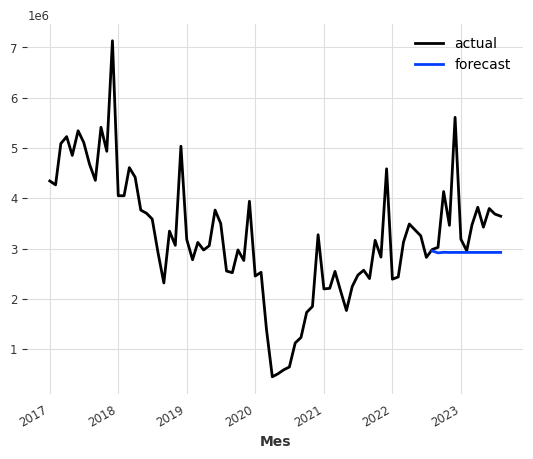

In [217]:
# Se inicializa, se entrena el modelo y se generan las predicciones
model_aarima = AutoARIMA(random_state = 10)
model_aarima.fit(trs_retail)
prediction = model_aarima.predict(len(tss_retail))
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'AutoARIMA','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes')

### **RNN (LSTM)**

In [220]:
# Se normaliza la base
from darts.dataprocessing.transformers import Scaler
transformer = Scaler()
train_transformed = transformer.fit_transform(trs_retail)
test_transformed = transformer.transform(tss_retail)
series_transformed = transformer.transform(dfs_retail)

In [221]:
# Se inicializa, se entrena el modelo y se generan las predicciones
model_RNN = RNNModel( model='LSTM',
    input_chunk_length=10,
    output_chunk_length=1,
    hidden_dim=25,
    n_rnn_layers=2,
    dropout=0.2,
    batch_size=32,
    n_epochs=100,
    optimizer_kwargs={'lr': 1e-3},
    log_tensorboard=True,
    random_state=42)
model_RNN.fit(train_transformed)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 8.0 K 
4 | V             | Linear           | 26    
---------------------------------------------------
8.0 K     Trainable params
0         Non-trainable params
8.0 K     Total params
0.032     Total estimated model params size (MB)


Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 50.16it/s, v_num=logs, train_loss=0.0221]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 2/2 [00:00<00:00, 47.19it/s, v_num=logs, train_loss=0.0221]


RNNModel(model=LSTM, hidden_dim=25, n_rnn_layers=2, dropout=0.2, training_length=24, input_chunk_length=10, output_chunk_length=1, batch_size=32, n_epochs=100, optimizer_kwargs={'lr': 0.001}, log_tensorboard=True, random_state=42)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 133.63it/s]


Test RMSE: 3689922.499
Test MSE: 13615528049700.219
Test MAE: 3629240.036
Test R2: -29.656


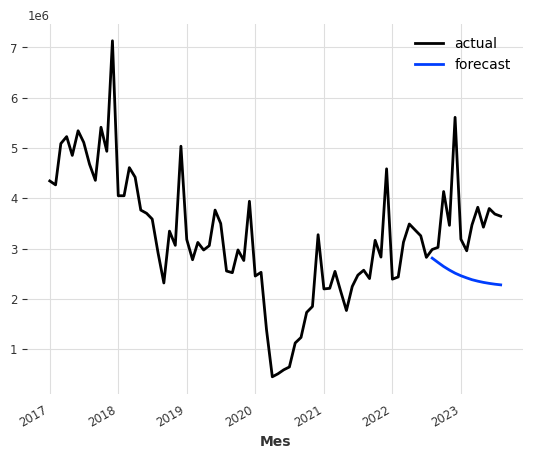

In [229]:
prediction = model_RNN.predict(len(test_transformed))
transformer.inverse_transform(prediction)

# Cálculo de las medidas de precisión
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)

row = pd.DataFrame([{'Modelo':'RNN (LSTM)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
transformer.inverse_transform(series_transformed).plot(label='actual')
transformer.inverse_transform(prediction).plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');


### **FFT (Fast Fourier Transform)**

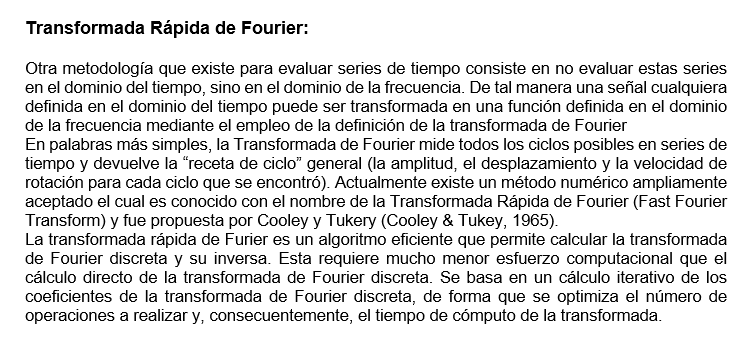

Test RMSE: 1352319.068
Test MSE: 1828766861225.228
Test MAE: 1257441.474
Test R2: -3.118


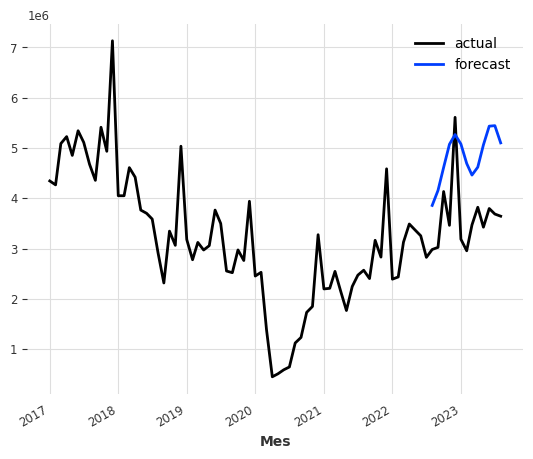

In [231]:
# Se inicializa, se entrena el modelo y se generan las predicciones
model = FFT()
model.fit(trs_retail)
prediction = model.predict(test.shape[0])
# calculate RMSE
rmse = sqrt(mean_squared_error(ts_retail['y'], prediction.pd_dataframe()))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MSE: %.3f' % mse)
mae = mean_absolute_error(ts_retail['y'], prediction.pd_dataframe())
print('Test MAE: %.3f' % mae)
r2 = r2_score(ts_retail['y'], prediction.pd_dataframe())
print('Test R2: %.3f' % r2)
row = pd.DataFrame([{'Modelo':'Fast Fourier Transform (FFT)','RMSE':rmse,'MSE':mse,'MAE':mae,'R2':r2}])
resultados =pd.concat([resultados,row],axis=0)
# Se grafican la base completa y las predicciones
dfs_retail.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.xlabel('Mes');

In [232]:
resultados

,Modelo,RMSE,MSE,MAE,R2
0,EXS: Simple,1.572607e+06,2.473092e+12,1.448188e+06,-4.568210e+00
0,EXS: Holt (Add),1.572607e+06,2.473092e+12,1.448188e+06,-4.568210e+00
0,EXS: Holt (Mult),1.194563e+06,1.426981e+12,1.104118e+06,-2.212873e+00
0,"EXS: Winter (Add,Add)",1.572607e+06,2.473092e+12,1.448188e+06,-4.568210e+00
0,"EXS: Winter (Mult,Add)",1.194563e+06,1.426981e+12,1.104118e+06,-2.212873e+00
0,"EXS: Winter (Mult,Mult)",1.536131e+10,2.359698e+20,6.191960e+09,-5.312902e+08
0,ARIMA,9.714045e+05,9.436267e+11,7.054076e+05,-1.124592e+00
0,RNN (LSTM),3.689922e+06,1.361553e+13,3.629240e+06,-2.965561e+01
0,Fast Fourier Transform (FFT),1.352319e+06,1.828767e+12,1.257441e+06,-3.117501e+00
